# RSA Analysis 

** we end up using searchlight RSA **

Comparing BART output with activity in BA10.

In this doc we will only work with pymvpa betas. And go more in depth as to what's driving the correlations

To do:
    - Accuracy model
    - post prob model
    

## Searchlight Classification

In [13]:
%%bash

qsub \
    -o /u/project/monti/njchiang/code/analogy/jobs/output/ \
    -e /u/project/monti/njchiang/code/analogy/jobs/output/ \
    -V -N ab-clf-searchlight \
    -l h_data=8G,h_rt=23:59:59 -pe shared 8 \
    -M ${USER} -m bea \
    /u/project/monti/njchiang/code/analogy/analogy-fmri/analysis/scripts/submit/run_ab_classification.sh


Your job 750018 ("ab-clf-searchlight") has been submitted


In [ ]:
%%bash

. ~/.bashrc

module load fsl
cd /u/project/monti/Analysis/Analogy

sel=AB


for m in BART Word2vec-diff Word2vec-concat # accuracy # rstpostprob79 rstpostprob9 w2vdiff concatword
do
  echo ${m}
  for s in 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16
  do
    echo sub-${s}
      flirt -in analysis/sub-${s}/encoding/sub-${s}_${m}_cope-LSS_${sel}_cv-relation \
      -out analysis/group/encoding/sub-${s}_${m}_${sel}_cv-relation \
      -ref derivatives/standard/MNI152_T1_2mm_brain.nii.gz \
      -applyxfm -init derivatives/sub-${s}/reg/BOLD_template_to_standard.mat
    fslmaths analysis/group/encoding/sub-${s}_${m}_${sel}_cv-relation -nan analysis/group/encoding/sub-${s}_${m}_${sel}_cv-relation
  done
  fslmerge -t analysis/group/encoding/group-ab_${m}_cv-relation.nii.gz analysis/group/encoding/sub*_${m}_${sel}_cv-relation.nii.gz
  rm analysis/group/encoding/sub*_${m}_${sel}_cv-relation.nii.gz

done


#       flirt -in analysis/sub-${s}/encoding/sub-${s}-${m}-cope-LSS_${sel}_cv-relation \

In [ ]:
%%bash

. ~/.bashrc
module load fsl

n=1000
cd /u/project/monti/Analysis/Analogy

for m in BART Word2vec-diff Word2vec-concat # rstpostprob79 rstpostprob9 w2vdiff concatword
do
    randomise -i analysis/group/encoding/group-ab_${m}_cv-relation \
      -o analysis/group/encoding/n${n}-ab_${m}_cv-relation \
      -m derivatives/standard/masks/grayMatter \
      -n ${n} -1 -T --uncorrp -v 10
done


## Searchlight RSA


In [1]:
%%bash
qsub \
    -o /u/project/monti/njchiang/code/analogy/jobs/output/ \
    -e /u/project/monti/njchiang/code/analogy/jobs/output/ \
    -V -N ab-rsa-searchlight-with270 \
    -l h_data=8G,h_rt=23:59:59 -pe shared 8 \
    -M ${USER} -m bea
    /u/project/monti/njchiang/code/analogy/analogy-fmri/analysis/scripts/submit/run_ab_rsa.sh


Your job 1234469 ("ab-rsa-searchlight-with270") has been submitted


In [3]:
%%bash

. ~/.bashrc

module load fsl
cd /u/project/monti/Analysis/Analogy

sel=AB

m=graymatter-bin_mask
echo ${m}
mkdir -p ${SCRATCH}/ab-rsa/split
for s in 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16
do
  echo sub-${s}
#   flirt -in analysis/sub-${s}/multivariate/rsa/sub-${s}_${m}_AB_corr_rsaSearchlight.nii.gz \
  flirt -in analysis/sub-${s}/multivariate/searchlight/sub-${s}_AB-rsa.nii.gz \
  -out analysis/group/multivariate/rsa/sub-${s}_AB-rsa.nii.gz \
  -ref derivatives/standard/MNI152_T1_2mm_brain.nii.gz \
  -applyxfm -init derivatives/sub-${s}/reg/BOLD_template_to_standard.mat
  fslmaths analysis/group/multivariate/rsa/sub-${s}_AB-rsa.nii.gz -nan analysis/group/multivariate/rsa/sub-${s}_AB-rsa.nii.gz
  fslsplit analysis/group/multivariate/rsa/sub-${s}_AB-rsa.nii.gz ${SCRATCH}/ab-rsa/split/sub-${s}_
done
# fslmerge -t analysis/group/multivariate/rsa/group_${m}_AB.nii.gz analysis/group/multivariate/rsa/sub*_${m}_AB_rsaSearchlight.nii.gz

fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_mainrel ${SCRATCH}/ab-rsa/split/*0000.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_design ${SCRATCH}/ab-rsa/split/*0001.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_nChars ${SCRATCH}/ab-rsa/split/*0002.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_humanratings ${SCRATCH}/ab-rsa/split/*0003.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_typicality ${SCRATCH}/ab-rsa/split/*0004.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_w2vDiff ${SCRATCH}/ab-rsa/split/*0005.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_w2vConcat ${SCRATCH}/ab-rsa/split/*0006.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_accuracy ${SCRATCH}/ab-rsa/split/*0007.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_BART9 ${SCRATCH}/ab-rsa/split/*0008.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_BART79 ${SCRATCH}/ab-rsa/split/*0009.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_BART79thresh ${SCRATCH}/ab-rsa/split/*0010.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_BART270 ${SCRATCH}/ab-rsa/split/*0011.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_BARTregressAcc ${SCRATCH}/ab-rsa/split/*0014.nii.gz 
fslmerge -t analysis/group/multivariate/rsa/pearson/group_AB_AccregressBART ${SCRATCH}/ab-rsa/split/*0015.nii.gz 
# fslmerge -t analysis/group/multivariate/rsa/group_gm_AB_designAndw2vDiff analysis/group/multivariate/rsa/split/*0007.nii.gz 
# fslmerge -t analysis/group/multivariate/rsa/group_gm_AB_designAndw2vConcat analysis/group/multivariate/rsa/split/*0008.nii.gz 
# fslmerge -t analysis/group/multivariate/rsa/group_gm_AB_BART9Andw2vConcat analysis/group/multivariate/rsa/split/*0009.nii.gz 

rm analysis/group/multivariate/rsa/sub*_AB-rsa.nii.gz
rm -r ${SCRATCH}/ab-rsa/split


#       flirt -in analysis/sub-${s}/encoding/sub-${s}-${m}-cope-LSS_${sel}_cv-relation \

graymatter-bin_mask
sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
sub-07
sub-08
sub-09
sub-10
sub-11
sub-12
sub-13
sub-14
sub-15
sub-16


In [4]:
%%bash

. ~/.bashrc
module load fsl

n=1000
cd /u/project/monti/Analysis/Analogy

for m in BARTregressAcc AccregressBART
do
    randomise -i analysis/group/multivariate/rsa/pearson/group_AB_${m} \
      -o analysis/group/multivariate/rsa/pearson/n${n}-AB_${m} \
      -m derivatives/standard/masks/grayMatter \
      -n ${n} -1 -T --uncorrp -v 10
done


randomise options: -i analysis/group/multivariate/rsa/pearson/group_AB_BARTregressAcc -o analysis/group/multivariate/rsa/pearson/n1000-AB_BARTregressAcc -m derivatives/standard/masks/grayMatter -n 1000 -1 -T --uncorrp -v 10 
Loading Data: 
Data loaded
One-sample design detected; sign-flipping instead of permuting.
65536 sign-flips required for exhaustive test of t-test 1
Doing 1000 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting p

In [4]:
%%bash
# bart - baseline and bart - accuracy

. ~/.bashrc

module load fsl
cd /u/project/monti/Analysis/Analogy

sel=AB
n=1000

fslmaths analysis/group/multivariate/rsa/pearson/group_AB_BART79 -sub analysis/group/multivariate/rsa/pearson/group_AB_BART79thresh analysis/group/multivariate/rsa/pearson/group_AB_BART79-BART79thresh
fslmaths analysis/group/multivariate/rsa/pearson/group_AB_BART79 -sub analysis/group/multivariate/rsa/pearson/group_AB_accuracy analysis/group/multivariate/rsa/pearson/group_AB_BART79-accuracy
fslmaths analysis/group/multivariate/rsa/pearson/group_AB_BART79 -sub analysis/group/multivariate/rsa/pearson/group_AB_mainrel analysis/group/multivariate/rsa/pearson/group_AB_BART79-baseline

for m in BART79-BART79thresh BART79-accuracy BART79-baseline # rstpostprob79 rstpostprob9 w2vdiff concatword
do
    randomise -i analysis/group/multivariate/rsa/pearson/group_AB_${m} \
      -o analysis/group/multivariate/rsa/pearson/n${n}-AB_${m} \
      -m derivatives/standard/masks/grayMatter \
      -n ${n} -1 -T --uncorrp -v 10
done

randomise options: -i analysis/group/multivariate/rsa/pearson/group_AB_BART79-BART79thresh -o analysis/group/multivariate/rsa/pearson/n1000-AB_BART79-BART79thresh -m derivatives/standard/masks/grayMatter -n 1000 -1 -T --uncorrp -v 10 
Loading Data: 
Data loaded
One-sample design detected; sign-flipping instead of permuting.
65536 sign-flips required for exhaustive test of t-test 1
Doing 1000 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24


In [ ]:
%%bash

. ~/.bashrc
module load fsl

n=1000
cd /u/project/monti/Analysis/Analogy

for m in accuracy BART79thresh BART79 BART270 BART9 nChars humanratings typicality mainrel design w2vConcat w2vDiff  # rstpostprob79 rstpostprob9 w2vdiff concatword
do
    randomise -i analysis/group/multivariate/rsa/pearson/group_AB_${m} \
      -o analysis/group/multivariate/rsa/pearson/n${n}-AB_${m} \
      -m derivatives/standard/masks/grayMatter \
      -n ${n} -1 -T --uncorrp -v 10
done


In [ ]:
%%bash

. ~/.bashrc
module load fsl

n=1000
cd /u/project/monti/Analysis/Analogy

for m in BART79-BART79thresh BART79-accuracy BART79-baseline accuracy BART79thresh BART79 BART270 BART9 nChars humanratings typicality mainrel design w2vConcat w2vDiff
do
    randomise -i analysis/group/multivariate/rsa/pearson/group_AB_${m} \
      -o analysis/group/multivariate/rsa/pearson/n${n}-AB_${m} \
      -m derivatives/standard/masks/grayMatter \
      -n ${n} -1 -T --uncorrp -v 10 -x
#     fdr -i analysis/group/multivariate/rsa/pearson/n${n}-AB_${m}_vox_p_tstat1 \
#         --oneminusp -m derivatives/standard/masks/grayMatter \
#         -q 0.05 -a analysis/group/multivariate/rsa/pearson/n${n}-AB_${m}_vox_fdrp_tstat1
done

In [4]:
%%bash

. ~/.bashrc
module load fsl

resultdir=analysis/group/multivariate/rsa/pearson

n=1000
cd /u/project/monti/Analysis/Analogy

for m in BART79-BART79thresh BART79-accuracy BART79-baseline accuracy BART79thresh BART79 BART270 BART9 nChars humanratings typicality mainrel design w2vConcat w2vDiff
do
    fdr -i ${resultdir}/n${n}-AB_${m}_tfce_p_tstat1 --oneminusp  \
        -m derivatives/standard/masks/grayMatter \
        -a ${resultdir}/n${n}-AB_${m}_tfce_fdrp_tstat1
#         -q 0.05 --othresh=${resultdir}/thresh_n${n}-AB_${m}_tfce_p_tstat1 \
    
    fdr -i ${resultdir}/n${n}-AB_${m}_vox_p_tstat1 --oneminusp \
        -m derivatives/standard/masks/grayMatter \
        -a ${resultdir}/n${n}-AB_${m}_vox_fdrp_tstat1
#         -q 0.05 --othresh=${resultdir}/thresh_n${n}-AB_${m}_vox_p_tstat1 \
done

Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0
Probability Threshold is: 
0


In [ ]:
%%bash

. ~/.bashrc
module load fsl

n=1000
cd /u/project/monti/Analysis/Analogy

for m in BART270 # BART9 nChars humanratings typicality mainrel design w2vConcat w2vDiff  # rstpostprob79 rstpostprob9 w2vdiff concatword
do
    randomise -i analysis/group/multivariate/rsa/pearson/group_AB_${m} \
      -o analysis/group/multivariate/rsa/pearson/n${n}-AB_${m} \
      -m derivatives/standard/masks/grayMatter \
      -n ${n} -1 -T --uncorrp -v 10
done

# Scratch

In [2]:
import json
import sys
import os
os.chdir("..")
from datetime import datetime
# import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

from analysis.fmri.analogy_utils import analysisSettings, contrastSettings, projectSettings, \
    PATHS, order, \
    pu, pa, pv, rsa, \
    compile_models, save_rois, load_rois, load_betas

from analysis.fmri.analogy_rsa import get_model_rdms

paths = PATHS

class CVSearchlight:
    def __init__(self, sub, mask_file=None, settings=analysisSettings["searchlight"], phase="AB", logger=None, phase_equals=True, phase_val=1):
        self.logger = logger
        self.sub = sub
        self.phase = phase
        self.target = "{}MainRel".format(phase.upper())
        self.mask = pu.load_img(mask_file, logger=logger) if mask_file else None
        self.fmri_data, self.labels, self.bg_image = load_betas(projectSettings, sub, t="cope-LSS", logger=logger)
        self.select_data(phase, phase_equals, phase_val)
        self.init_sl(settings)
        self.outpath = os.path.join(paths["root"], "analysis", sub, "multivariate", "searchlight", "mvpa", "{}_{}-cvsl.nii.gz".format(sub, phase))

    def select_data(self, phase="AB", equals=True, val=1):
        if equals:
            self.selector = self.labels[self.labels[phase] == val]
        else:
            self.selector = self.labels[self.labels[phase] != val]
        self.fmri_data = pu.index_img(self.fmri_data, self.selector.index)

    def init_sl(self, settings):
        settings["estimator"] = Pipeline(steps=[  # (
            # "variance_threshold", VarianceThreshold()),
            ("scaling", StandardScaler()),
        #            ("feature_select", SelectPercentile(f_classif, percentile=20)),
        #            ("feature_select", SelectKBest(f_classif, k=100)),
            ("svm", LinearSVC(C=0.05))
        #            ("plr", LogisticRegression(C=0.05, penalty="l1", tol=0.01))
        ])
        self.cv = LeaveOneGroupOut()
        self.sl_options = settings

    def run(self, **unused):
        result = pa.searchlight(self.fmri_data, self.selector[self.target],
                                m=self.mask, cv=self.cv,
                                groups=self.selector['chunks'], write=False,
                                logger=self.logger, **self.sl_options)
        pu.data_to_img(result.scores_, self.bg_image, logger=self.logger).to_filename(self.outpath)
        return result
    
class RSASearchlight(CVSearchlight):
    def __init__(self, sub, mask_file=None, settings=analysisSettings["searchlight"], phase="AB", logger=None, phase_equals=True, phase_val=1):
        super(RSASearchlight, self).__init__(sub, mask_file, settings=settings, phase=phase, logger=logger, phase_equals=phase_equals, phase_val=phase_val)
        self.outpath = os.path.join(paths["root"], "analysis", sub, "multivariate", "searchlight", "{}_{}-rsa.nii.gz".format(sub, phase))
    def select_data(self, phase="AB", equals=True, val=1):
        # will be a little more complex
        if equals:
            self.selector = self.labels[self.labels[phase] == val].sort_values(["SubRel", "TrialTag"])
        else:
            self.selector = self.labels[self.labels[phase] != val]
        self.fmri_data = pu.index_img(self.fmri_data, self.selector.index)

    def init_sl(self, settings):
        settings["rdm_metric"] = "correlation"
        self.sl_options = settings

    def run(self, modelrdms):
        result = pa.searchlight_rsa(
            self.fmri_data, modelrdms,
            m=self.mask, write=False,
            logger=self.logger, **self.sl_options)
        pu.data_to_img(result.scores_, self.bg_image, logger=self.logger).to_filename(self.outpath)
        return result
    
class RSAResidualSearchlight(CVSearchlight):
    def __init__(self, sub, mask_file=None, settings=analysisSettings["searchlight"], phase="AB", logger=None, phase_equals=True, phase_val=1):
        super(RSASearchlight, self).__init__(sub, mask_file, settings=settings, phase=phase, logger=logger, phase_equals=phase_equals, phase_val=phase_val)
        self.outpath = os.path.join(paths["root"], "analysis", sub, "multivariate", "searchlight", "{}_{}-rsa.nii.gz".format(sub, phase))
    def select_data(self, phase="AB", equals=True, val=1):
        # will be a little more complex
        if equals:
            self.selector = self.labels[self.labels[phase] == val].sort_values(["SubRel", "TrialTag"])
        else:
            self.selector = self.labels[self.labels[phase] != val]
        self.fmri_data = pu.index_img(self.fmri_data, self.selector.index)

    def init_sl(self, settings):
        settings["rdm_metric"] = "correlation"
        self.sl_options = settings

    def run(self, modelrdms):
        result = pa.searchlight_rsa(
            self.fmri_data, modelrdms,
            m=self.mask, write=False,
            logger=self.logger, **self.sl_options)
        pu.data_to_img(result.scores_, self.bg_image, logger=self.logger).to_filename(self.outpath)
        return result

/u/home/n/njchiang/.conda/envs/fmri/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Loading JSON config from config/analyses.json
Loading JSON config from config/contrasts.json
Loading label file from: labels/trialorder_rsa_absorted.csv


In [2]:
logger=None
phase = "AB"
sub = "sub-01"
roi = "dfc-left-ba10_mask"
# roi = "graymatter-bin_mask"
mask_file = os.path.join(paths["root"], "derivatives", sub, "masks", "{}.nii.gz".format(roi))

sl = RSASearchlight(sub, mask_file, phase=phase, settings=analysisSettings["searchlight"], logger=logger)

Reading file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/masks/dfc-left-ba10_mask.nii.gz
centering image
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/func/sub-01_task-analogy_run-01_events.csv
centering image
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/func/sub-01_task-analogy_run-02_events.csv
centering image
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/func/sub-01_task-analogy_run-03_events.csv
centering image
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/func/sub-01_task-analogy_run-04_events.csv
centering image
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/func/sub-01_task-analogy_run-05_events.csv
centering image
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/func/sub-01_task-analogy_run-06_events.csv
centering image
Loading label file from: /u/project/monti/Analysis/Analogy

In [ ]:
        
        resids = sm.OLS(roi[selector.index].mean(1), np.vstack([dists_bart]).T).fit().resid
        subs.append(sub)
        masks.append(m)
        models.append("bart-w2vD")
        corrs.append(rsa.spearmanr(resids, dists_w2vd)[0])

In [28]:
import statsmodels.api as sm

modelrdms = rdms[(rdms.type == "full")].iloc[:, 2:].fillna(0).values.astype(np.float64)

bart = rdms[rdms.name=="rstpostprob79"].iloc[:, 2:].fillna(0)
acc = rdms[rdms.name=="accuracy"].iloc[:, 2:].fillna(0)
bart_regress_acc = sm.OLS(bart.T, acc.T).fit().resid
acc_regress_bart = sm.OLS(acc.T, bart.T).fit().resid

bart_regress_acc.shape, acc_regress_bart.shape, np.allclose(resid_acc_bart, resid_bart_acc)

((41328,), (41328,), False)

(<matplotlib.image.AxesImage at 0x2b7ec77d0d50>,
 <matplotlib.image.AxesImage at 0x2b7ec770a7d0>)

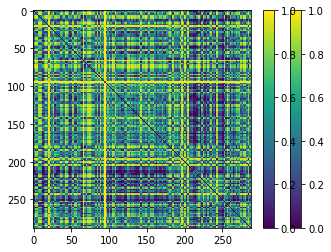

In [33]:
pv.plot_rdm(bart_regress_acc), pv.plot_rdm(acc_regress_bart)

Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy-fmri/labels/raw_models.csv


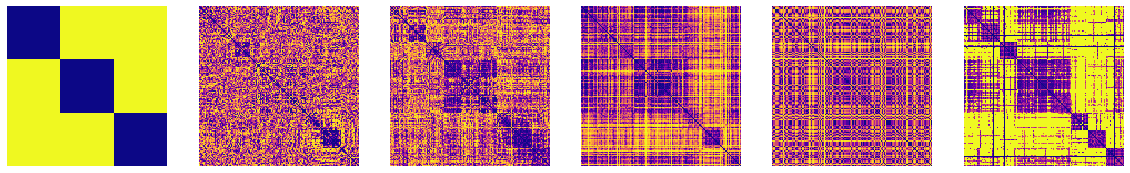

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# model_figure
# plotmodels_old(models, save=False)

modelnames = ["mainrel", "w2vdiff", "concatword", "rstpostprob79", "accuracy", "bart79thresh"]

raw_vis_models_df = pu.load_labels(os.path.join(paths["code"], "labels", "raw_models.csv"))
vis_model_rdms = get_model_rdms(raw_vis_models_df, modelnames)
# .sort_values("MainCond", "ABTag")


f = plt.figure(figsize=(20,10))
axarr = f.subplots(1, len(vis_model_rdms.name.unique()))
rdms = vis_model_rdms[vis_model_rdms.type == "full"]
for j, m in enumerate(vis_model_rdms.name.unique()):
    pv.plot_rdm(rdms[rdms.name==m].iloc[:, 2:].fillna(0), #.dropna(axis=1),
#     pv.plot_rdm(rdms[rdms.name==m].iloc[:, 2:].fillna(0),
           ax=axarr[j], cb=False, cmap="plasma")
#     axarr[j].set_title(m)
    axarr[j].set_axis_off()
    
# f.savefig(os.path.join(paths["cloud"], "Figures", "rsa-models.png"))

In [45]:
vis_model_rdms[(vis_model_rdms.type == "full") & (vis_model_rdms.name == "bart79thresh")].isna().sum().sum()

1707

In [43]:
modelrdms = vis_model_rdms[(vis_model_rdms.type == "full")].iloc[:, 2:].dropna(axis=1).values.astype(np.float64)
modelrdms = vis_model_rdms[(vis_model_rdms.type == "full")].iloc[:, 2:].fillna(0).values.astype(np.float64)
# modelrdms = vis_model_rdms[(vis_model_rdms.type == "avg")].dropna(axis=1).values[:, 2:].astype(np.float64)

In [44]:
modelrdms.shape

(6, 41328)

[Text(0, 1, ''),
 Text(0, 1, 'Baseline'),
 Text(0, 1, 'Word2vec-diff'),
 Text(0, 1, 'Word2vec-concat'),
 Text(0, 1, 'BART')]

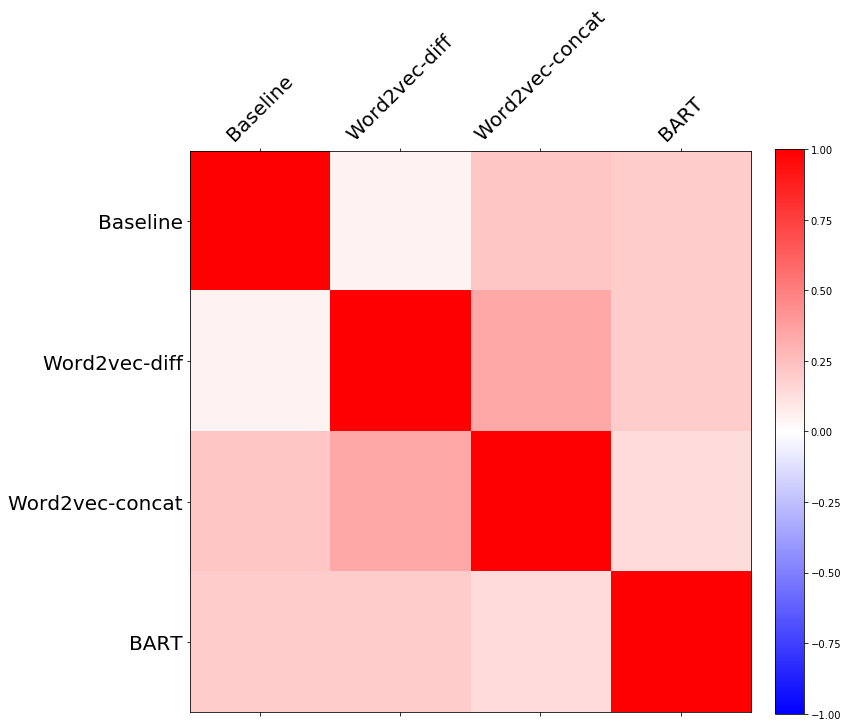

In [35]:
# Relationship between the models
model_rdms = vis_model_rdms
modelnames = ["", "Baseline", "Word2vec-diff", "Word2vec-concat", "BART", ]

f = plt.figure(figsize=(11, 11))
ax = f.gca()
# f, axarr = plt.subplots(1,3, figsize=(11, 8.5))
im = ax.matshow(
        model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
    vmin=-1, vmax=1, cmap="bwr")
f.colorbar(im, fraction=0.046, pad=0.04)
# ax.set_xticks(range(len(modelnames)))
# ax.set_yticks(range(len(modelnames)))
ax.set_yticklabels(modelnames, fontsize=20)
ax.set_xticklabels(modelnames, rotation=45, fontsize=20)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman.png"))

# f = plt.figure(figsize=(8.5, 11))
# ax = f.gca()
# im = pv.plot_rdm(model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
#             ax=ax, cb=False, cmap="jet", mode="corr", scale=True, rank=True, vmin=0, vmax=1)
# f.colorbar(im, fraction=0.046, pad=0.04)

# ax.set_xticks(range(len(modelnames)))
# ax.set_yticks(range(len(modelnames)))
# ax.set_yticklabels(modelnames)
# ax.set_xticklabels(modelnames, rotation=45)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman-ranked.png"))

# axarr[2].set_xticks(range(len(modelnames)))
# axarr[2].set_yticks(range(len(modelnames)))
# axarr[2].set_yticklabels(modelnames)
# axarr[2].set_xticklabels(modelnames, rotation=75)

In [4]:
from analysis.fmri.analogy_rsa import get_model_rdms

modelnames = [
            "mainrel", "rel", "numchar", "humanratings", "typicality",
            "w2vdiff", "concatword", "rstpostprob9", "rstpostprob79"]# , ]
raw_models_df = pu.load_labels(os.path.join(paths["code"], "labels/raw_models.csv"))
model_rdms = get_model_rdms(raw_models_df, modelnames)
modelrdms = model_rdms[(model_rdms.type == "full")].dropna(axis=1).values[:, 2:].astype(np.float64)

modelrdms[0][1] = np.nan  # see if we can replicate error
modelrdms[1] = np.zeros(modelrdms[1].shape)
modelrdms.shape


Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy-fmri/labels/raw_models.csv


(9, 41328)

In [5]:
x = sl.fmri_data.get_data()[1:3, 1:3, 1:3, :].transpose([3, 0, 1, 2]).reshape(288, -1)

In [6]:
roi_rdm = rsa.rdm(x, metric="correlation")
1 - rsa.rdm(np.vstack([roi_rdm, modelrdms]).astype(np.float64), metric="spearman", return_p=False)

/u/home/n/njchiang/.conda/envs/fmri/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/u/home/n/njchiang/.conda/envs/fmri/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/u/home/n/njchiang/.conda/envs/fmri/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/u/home/n/njchiang/.conda/envs/fmri/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/u/home/n/njchiang/.conda/envs/fmri/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  0.0596707 ,
       -0.02336561,  0.00889081,  0.07877774,  0.08815722,  0.09902996,
        0.02915433,  0.07979786,  0.24782568,  0.25317203,  0.22416953,
       -0.00104395,  0.00098889,  0.10142633,  0.14304838,  0.34333765,
        0.14764529,  0.2062172 ,  0.15811788,  0.14853567,  0.860852  ])

In [38]:
def _chk_asarray(a, axis):
    if axis is None:
        a = np.ravel(a)
        outaxis = 0
    else:
        a = np.asarray(a)
        outaxis = axis

    if a.ndim == 0:
        a = np.atleast_1d(a)

    return a, outaxis


def _chk2_asarray(a, b, axis):
    if axis is None:
        a = np.ravel(a)
        b = np.ravel(b)
        outaxis = 0
    else:
        a = np.asarray(a)
        b = np.asarray(b)
        outaxis = axis

    if a.ndim == 0:
        a = np.atleast_1d(a)
    if b.ndim == 0:
        b = np.atleast_1d(b)

    return a, b, outaxis


def _contains_nan(a, nan_policy='propagate'):
    policies = ['propagate', 'raise', 'omit']
    if nan_policy not in policies:
        raise ValueError("nan_policy must be one of {%s}" %
                         ', '.join("'%s'" % s for s in policies))
    try:
        # Calling np.sum to avoid creating a huge array into memory
        # e.g. np.isnan(a).any()
        with np.errstate(invalid='ignore'):
            contains_nan = np.isnan(np.sum(a))
    except TypeError:
        # This can happen when attempting to sum things which are not
        # numbers (e.g. as in the function `mode`). Try an alternative method:
        try:
            contains_nan = np.nan in set(a.ravel())
        except TypeError:
            # Don't know what to do. Fall back to omitting nan values and
            # issue a warning.
            contains_nan = False
            nan_policy = 'omit'
            warnings.warn("The input array could not be properly checked for nan "
                          "values. nan values will be ignored.", RuntimeWarning)

    if contains_nan and nan_policy == 'raise':
        raise ValueError("The input contains nan values")

    return (contains_nan, nan_policy)

from scipy.stats import mstats_basic
from scipy.stats import rankdata, distributions
import pdb

def spearmanr(a, b=None, axis=0, nan_policy='propagate'):
    """
    Calculate a Spearman rank-order correlation coefficient and the p-value
    to test for non-correlation.
    The Spearman correlation is a nonparametric measure of the monotonicity
    of the relationship between two datasets. Unlike the Pearson correlation,
    the Spearman correlation does not assume that both datasets are normally
    distributed. Like other correlation coefficients, this one varies
    between -1 and +1 with 0 implying no correlation. Correlations of -1 or
    +1 imply an exact monotonic relationship. Positive correlations imply that
    as x increases, so does y. Negative correlations imply that as x
    increases, y decreases.
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Spearman correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 500 or so.
    Parameters
    ----------
    a, b : 1D or 2D array_like, b is optional
        One or two 1-D or 2-D arrays containing multiple variables and
        observations. When these are 1-D, each represents a vector of
        observations of a single variable. For the behavior in the 2-D case,
        see under ``axis``, below.
        Both arrays need to have the same length in the ``axis`` dimension.
    axis : int or None, optional
        If axis=0 (default), then each column represents a variable, with
        observations in the rows. If axis=1, the relationship is transposed:
        each row represents a variable, while the columns contain observations.
        If axis=None, then both arrays will be raveled.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    Returns
    -------
    correlation : float or ndarray (2-D square)
        Spearman correlation matrix or correlation coefficient (if only 2
        variables are given as parameters. Correlation matrix is square with
        length equal to total number of variables (columns or rows) in ``a``
        and ``b`` combined.
    pvalue : float
        The two-sided p-value for a hypothesis test whose null hypothesis is
        that two sets of data are uncorrelated, has same dimension as rho.
    References
    ----------
    .. [1] Zwillinger, D. and Kokoska, S. (2000). CRC Standard
       Probability and Statistics Tables and Formulae. Chapman & Hall: New
       York. 2000.
       Section  14.7
    Examples
    --------
    >>> from scipy import stats
    >>> stats.spearmanr([1,2,3,4,5], [5,6,7,8,7])
    (0.82078268166812329, 0.088587005313543798)
    >>> np.random.seed(1234321)
    >>> x2n = np.random.randn(100, 2)
    >>> y2n = np.random.randn(100, 2)
    >>> stats.spearmanr(x2n)
    (0.059969996999699973, 0.55338590803773591)
    >>> stats.spearmanr(x2n[:,0], x2n[:,1])
    (0.059969996999699973, 0.55338590803773591)
    >>> rho, pval = stats.spearmanr(x2n, y2n)
    >>> rho
    array([[ 1.        ,  0.05997   ,  0.18569457,  0.06258626],
           [ 0.05997   ,  1.        ,  0.110003  ,  0.02534653],
           [ 0.18569457,  0.110003  ,  1.        ,  0.03488749],
           [ 0.06258626,  0.02534653,  0.03488749,  1.        ]])
    >>> pval
    array([[ 0.        ,  0.55338591,  0.06435364,  0.53617935],
           [ 0.55338591,  0.        ,  0.27592895,  0.80234077],
           [ 0.06435364,  0.27592895,  0.        ,  0.73039992],
           [ 0.53617935,  0.80234077,  0.73039992,  0.        ]])
    >>> rho, pval = stats.spearmanr(x2n.T, y2n.T, axis=1)
    >>> rho
    array([[ 1.        ,  0.05997   ,  0.18569457,  0.06258626],
           [ 0.05997   ,  1.        ,  0.110003  ,  0.02534653],
           [ 0.18569457,  0.110003  ,  1.        ,  0.03488749],
           [ 0.06258626,  0.02534653,  0.03488749,  1.        ]])
    >>> stats.spearmanr(x2n, y2n, axis=None)
    (0.10816770419260482, 0.1273562188027364)
    >>> stats.spearmanr(x2n.ravel(), y2n.ravel())
    (0.10816770419260482, 0.1273562188027364)
    >>> xint = np.random.randint(10, size=(100, 2))
    >>> stats.spearmanr(xint)
    (0.052760927029710199, 0.60213045837062351)
    """
    a, axisout = _chk_asarray(a, axis)
    x = a
    if a.ndim > 2:
        raise ValueError("spearmanr only handles 1-D or 2-D arrays")

    if b is None:
        if a.ndim < 2:
            raise ValueError("`spearmanr` needs at least 2 variables to compare")
    else:
        # Concatenate a and b, so that we now only have to handle the case
        # of a 2-D `a`.
        b, _ = _chk_asarray(b, axis)
        if axisout == 0:
            a = np.column_stack((a, b))
        else:
            a = np.row_stack((a, b))

    n_vars = a.shape[1 - axisout]
    n_obs = a.shape[axisout]
    if n_obs <= 1:
        # Handle empty arrays or single observations.
        return (np.nan, np.nan)

    a_contains_nan, nan_policy = _contains_nan(a, nan_policy)
    variable_has_nan = np.zeros(n_vars, dtype=bool)
    if a_contains_nan:
        if nan_policy == 'omit':
            return mstats_basic.spearmanr(a, axis=axis, nan_policy=nan_policy)
        elif nan_policy == 'propagate':
            if a.ndim == 1 or n_vars <= 2:
                return (np.nan, np.nan)
            else:
                # Keep track of variables with NaNs, set the outputs to NaN
                # only for those variables
                variable_has_nan = np.isnan(a).sum(axis=axisout).astype(np.bool)

    a_ranked = np.apply_along_axis(rankdata, axisout, a)
    rs = np.corrcoef(a_ranked, rowvar=axisout)
    dof = n_obs - 2  # degrees of freedom

    # rs can have elements equal to 1, so avoid zero division warnings
    olderr = np.seterr(divide='ignore')
    try:
        # clip the small negative values possibly caused by rounding
        # errors before taking the square root
        t = rs * np.sqrt((dof/((rs+1.0)*(1.0-rs))).clip(0))
    finally:
        np.seterr(**olderr)

    prob = 2 * distributions.t.sf(np.abs(t), dof)
#     pdb.set_trace()
    # For backwards compatibility, return scalars when comparing 2 columns
    if rs.shape == (2, 2):
        return (rs[1, 0], prob[1, 0])
    else:
        rs[variable_has_nan, :] = np.nan
        rs[:, variable_has_nan] = np.nan
        return (rs, prob)

In [31]:
roi_rdm

array([nan, nan, nan, ..., nan, nan, nan])

In [43]:
spearmanr(np.vstack([roi_rdm, modelrdms]).astype(np.float64), axis=1)[1]

array([[0.00000000e+000, 0.00000000e+000,             nan,
        1.51047808e-005, 0.00000000e+000, 2.55946331e-007,
        6.22709844e-002, 9.87735531e-187, 1.24488616e-002,
        6.92088071e-012],
       [0.00000000e+000, 0.00000000e+000,             nan,
        1.28098786e-032, 0.00000000e+000, 1.61663967e-002,
        1.35147258e-032, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [1.51047808e-005, 1.28098786e-032,             nan,
        0.00000000e+000, 6.39749074e-034, 2.02847410e-006,
        7.06970451e-002, 6.78051603e-058, 4.29500564e-072,
        1.43522217e-090],
       [0.00000000e+000, 0.00000000e+000,             nan,
        6.39749074e-034, 0.00000000e+000, 3.06742351e-009,
        2.31675272e-059, 0.00000000e+000, 0.00000000e+000,
        0.0

In [22]:
slargs = {"modelrdms": modelrdms}
result = sl.run(**slargs)


starting searchlight at 2019-09-04 22:21:53.065818
searchlight params: {'radius': 5, 'n_jobs': -1, 'verbose': 1, 'rdm_metric': 'correlation'}


KeyboardInterrupt: 

In [23]:
rsa.spearman_distance(np.eye(3))

(array([[0. , 1.5, 1.5],
        [1.5, 0. , 1.5],
        [1.5, 1.5, 0. ]]), array([[0.        , 0.66666667, 0.66666667],
        [0.66666667, 0.        , 0.66666667],
        [0.66666667, 0.66666667, 0.        ]]))

In [26]:
a = np.random.rand(3, 100)
rsa.spearman_distance(a)

(array([[1.11022302e-16, 8.73567357e-01, 9.52499250e-01],
        [8.73567357e-01, 1.11022302e-16, 1.10082208e+00],
        [9.52499250e-01, 1.10082208e+00, 1.11022302e-16]]),
 array([[0.        , 0.21003558, 0.63885483],
        [0.21003558, 0.        , 0.31823524],
        [0.63885483, 0.31823524, 0.        ]]))